In [50]:
# allow matplotlib graphics to display in the notebook
%matplotlib inline
from matplotlib.pyplot import imshow, figure

import numpy, glob
from PIL import Image

# import validation methods from scikit-learn
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split

# import the dataset and neural network layers from keras
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Flatten, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical

In [88]:
NUM_ROWS = 128
NUM_COLUMNS = 128
NUM_COLORS = 1
IMG_SHAPE = (NUM_ROWS, NUM_COLUMNS, NUM_COLORS)

NUM_CLASSES = 2

size = 128, 128

In [45]:
# def get_data(img):
#     width, height = img.size
#     pixels = img.getdata()
#     x_data, y_data = [],[]
#     for y in range(height):
#         for x in range(width):
#             idx = x + y * width
#             r, g, b = pixels[idx]
#             x_data.append([x / float(width), y / float(height)])
#             y_data.append([r, g, b])
#     x_data = np.array(x_data)
#     y_data = np.array(y_data)
#     return x_data, y_data

#im1 = Image.open("./dog.jpg")
#x1, y1 = get_data(im1)

#print("data", x1)
#print("labels", y1)
#imshow(im1)

## Resizing images

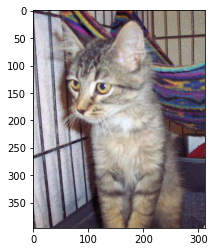

In [41]:
# https://www.kaggle.com/biaiscience/dogs-vs-cats
im1 = Image.open("/Users/yoarafa/Documents/MachineLearning/DogsCats/train/train/cat.2.jpg")
imshow(im1)

In [42]:
width, height = im1.size
if width < height:
    new_width = width
    new_height = width
else:
    new_width = height
    new_height = height


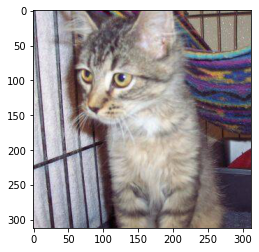

In [43]:
# https://stackoverflow.com/questions/16646183/crop-an-image-in-the-centre-using-pil
left = round((width - new_width)/2)
top = round((height - new_height)/2)
x_right = round(width - new_width) - left
x_bottom = round(height - new_height) - top
right = width - x_right
bottom = height - x_bottom

im1 = im1.crop((left, top, right, bottom))
imshow(im1)

(128, 128)


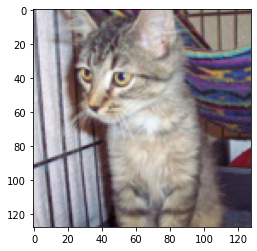

In [47]:
im1 = im1.resize(size)
print(im1.size)
imshow(im1)

In [48]:
# https://pillow.readthedocs.io/en/stable/reference/Image.html
for infile in glob.glob("/Users/yoarafa/Documents/MachineLearning/DogsCats/train/train/*.jpg"):
    with Image.open(infile) as im:
        width, height = im.size
        if width < height:
            new_width = width
            new_height = width
        else:
            new_width = height
            new_height = height
        
        left = round((width - new_width)/2)
        top = round((height - new_height)/2)
        x_right = round(width - new_width) - left
        x_bottom = round(height - new_height) - top
        right = width - x_right
        bottom = height - x_bottom

        im = im.crop((left, top, right, bottom))
        im = im.resize(size)
        im.save(infile)

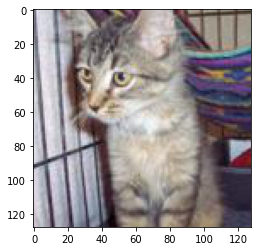

In [49]:
im1 = Image.open("/Users/yoarafa/Documents/MachineLearning/DogsCats/train/train/cat.2.jpg")
imshow(im1)

In [51]:
im1array = numpy.asarray(im1)

In [52]:
im1array

array([[[120, 117, 134],
        [131, 129, 143],
        [236, 234, 248],
        ...,
        [137, 127, 115],
        [131, 123, 110],
        [126, 118, 105]],

       [[120, 117, 134],
        [128, 126, 140],
        [233, 231, 245],
        ...,
        [ 61,  51,  39],
        [ 59,  51,  38],
        [ 56,  48,  35]],

       [[122, 119, 136],
        [126, 124, 138],
        [229, 227, 241],
        ...,
        [ 86,  76,  64],
        [ 88,  80,  67],
        [ 89,  81,  68]],

       ...,

       [[204, 192, 204],
        [203, 193, 204],
        [188, 182, 192],
        ...,
        [ 58,  56,  80],
        [ 61,  57,  82],
        [ 62,  58,  83]],

       [[196, 184, 196],
        [208, 198, 209],
        [194, 188, 198],
        ...,
        [ 60,  58,  82],
        [ 61,  57,  82],
        [ 60,  56,  81]],

       [[186, 174, 186],
        [208, 198, 209],
        [196, 190, 200],
        ...,
        [ 75,  73,  97],
        [ 73,  69,  94],
        [ 69,  65,  90]]

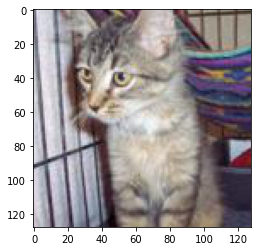

In [55]:
imshow(im1array)

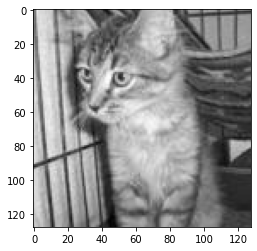

In [59]:
imshow(im1.convert('LA'))

In [68]:
#(images_train, labels_train), (images_test, labels_test)
images_train = []
labels_train = []

In [69]:
for infile in glob.glob("/Users/yoarafa/Documents/MachineLearning/DogsCats/train/train/*.jpg"):
    with Image.open(infile) as im:
        width, height = im.size
        im = numpy.asarray(im.convert('LA'))
        images_train.append(im)
        labels_train.append(0 if 'cat' in infile else 1)

In [70]:
images_train = numpy.array(images_train)
labels_train = numpy.array(labels_train)

In [71]:
images_train, images_test, labels_train, labels_test = train_test_split(images_train, labels_train, test_size=0.15, random_state=42)

In [72]:
images_train.shape

(21250, 128, 128, 2)

In [73]:
labels_train.shape

(21250,)

In [74]:
images_test.shape

(3750, 128, 128, 2)

In [75]:
images_train[100]

array([[[ 32, 255],
        [ 54, 255],
        [ 59, 255],
        ...,
        [156, 255],
        [143, 255],
        [131, 255]],

       [[ 38, 255],
        [ 46, 255],
        [ 50, 255],
        ...,
        [150, 255],
        [151, 255],
        [141, 255]],

       [[ 35, 255],
        [ 31, 255],
        [ 36, 255],
        ...,
        [137, 255],
        [158, 255],
        [154, 255]],

       ...,

       [[ 98, 255],
        [105, 255],
        [113, 255],
        ...,
        [160, 255],
        [159, 255],
        [140, 255]],

       [[ 37, 255],
        [ 32, 255],
        [ 25, 255],
        ...,
        [149, 255],
        [157, 255],
        [139, 255]],

       [[ 10, 255],
        [  9, 255],
        [  7, 255],
        ...,
        [133, 255],
        [146, 255],
        [120, 255]]], dtype=uint8)

In [76]:
numpy.squeeze(images_train[100])

array([[[ 32, 255],
        [ 54, 255],
        [ 59, 255],
        ...,
        [156, 255],
        [143, 255],
        [131, 255]],

       [[ 38, 255],
        [ 46, 255],
        [ 50, 255],
        ...,
        [150, 255],
        [151, 255],
        [141, 255]],

       [[ 35, 255],
        [ 31, 255],
        [ 36, 255],
        ...,
        [137, 255],
        [158, 255],
        [154, 255]],

       ...,

       [[ 98, 255],
        [105, 255],
        [113, 255],
        ...,
        [160, 255],
        [159, 255],
        [140, 255]],

       [[ 37, 255],
        [ 32, 255],
        [ 25, 255],
        ...,
        [149, 255],
        [157, 255],
        [139, 255]],

       [[ 10, 255],
        [  9, 255],
        [  7, 255],
        ...,
        [133, 255],
        [146, 255],
        [120, 255]]], dtype=uint8)

In [77]:
# https://stackoverflow.com/questions/37152031/numpy-remove-a-dimension-from-np-array/62464952
images_train[100][:, :, 0]

array([[ 32,  54,  59, ..., 156, 143, 131],
       [ 38,  46,  50, ..., 150, 151, 141],
       [ 35,  31,  36, ..., 137, 158, 154],
       ...,
       [ 98, 105, 113, ..., 160, 159, 140],
       [ 37,  32,  25, ..., 149, 157, 139],
       [ 10,   9,   7, ..., 133, 146, 120]], dtype=uint8)

In [80]:
images_train[:, :, :, 0].shape

(21250, 128, 128)

In [82]:
images_train = images_train[:, :, :, 0]
images_test = images_test[:, :, :, 0]

In [85]:
images_3d_train = numpy.expand_dims(images_train, axis=3)
labels_onehot_train = to_categorical(labels_train)
images_3d_test = numpy.expand_dims(images_test, axis=3)

In [89]:
model = Sequential()

model.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=16, kernel_size=3, strides=1, padding='same', activation='tanh'))
model.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='tanh'))

model.add(Flatten())
model.add(Dense(units=20, activation='tanh'))

model.add(Dense(units=NUM_CLASSES, activation='softmax'))
model.compile(optimizer=SGD(), loss='categorical_crossentropy')

In [90]:
model.fit(images_3d_train, labels_onehot_train, epochs=6)

Epoch 1/6
665/665 [==============================] - 111s 166ms/step - loss: 0.7155
Epoch 2/6
665/665 [==============================] - 107s 161ms/step - loss: 0.6939
Epoch 3/6
665/665 [==============================] - 107s 161ms/step - loss: 0.6940
Epoch 4/6
665/665 [==============================] - 106s 159ms/step - loss: 0.6937
Epoch 5/6
665/665 [==============================] - 106s 160ms/step - loss: 0.6942
Epoch 6/6
665/665 [==============================] - 110s 165ms/step - loss: 0.6940


In [92]:
predictions_test_onehot = model.predict(images_3d_test)
predictions_test = numpy.argmax(predictions_test_onehot, axis=1)

In [93]:
accuracy_score(y_true=labels_test, y_pred=predictions_test)

0.5098666666666667

In [94]:
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.        , 0.50986667]),
 array([0., 1.]),
 array([0.        , 0.67537972]),
 array([1838, 1912]))

In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 8)       1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2621460   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 2,622,822
Trainable params: 2,622,822
Non-trainable params: 0
_________________________________________________________________


In [142]:
model2 = Sequential()

model2.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(Conv2D(filters=8, kernel_size=2, strides=1, padding='same', activation='relu'))
model2.add(Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(Conv2D(filters=4, kernel_size=2, strides=1, padding='same', activation='relu'))

model2.add(Flatten())
model2.add(Dense(units=20, activation='tanh'))
model2.add(Dense(units=10, activation='tanh'))

model2.add(Dense(units=NUM_CLASSES, activation='softmax'))
model2.compile(optimizer=SGD(), loss='categorical_crossentropy')

In [142]:
model2 = Sequential()

model2.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=8, kernel_size=8, strides=4, padding='same', activation='relu'))
model2.add(Conv2D(filters=16, kernel_size=4, strides=2, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=32, kernel_size=4, strides=2, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=48, kernel_size=4, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=48, kernel_size=3, strides=1, padding='same', activation='relu'))
#model2.add(MaxPooling2D(pool_size=2))

model2.add(Flatten())
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=256, activation='relu'))

model2.add(Dense(units=NUM_CLASSES, activation='softmax'))
model2.compile(optimizer=SGD(), loss='categorical_crossentropy')

In [153]:
model2.fit(images_3d_train, labels_onehot_train, epochs=50) # 90 epochs total

Epoch 1/50
665/665 [==============================] - 11s 16ms/step - loss: 0.1794
Epoch 2/50
665/665 [==============================] - 12s 18ms/step - loss: 0.1732
Epoch 3/50
665/665 [==============================] - 12s 18ms/step - loss: 0.1641
Epoch 4/50
665/665 [==============================] - 14s 21ms/step - loss: 0.1618
Epoch 5/50
665/665 [==============================] - 12s 18ms/step - loss: 0.1637
Epoch 6/50
665/665 [==============================] - 12s 18ms/step - loss: 0.1540
Epoch 7/50
665/665 [==============================] - 12s 18ms/step - loss: 0.1469
Epoch 8/50
665/665 [==============================] - 12s 17ms/step - loss: 0.1416
Epoch 9/50
665/665 [==============================] - 12s 18ms/step - loss: 0.1327
Epoch 10/50
665/665 [==============================] - 15s 22ms/step - loss: 0.1341
Epoch 11/50
665/665 [==============================] - 12s 17ms/step - loss: 0.1283
Epoch 12/50
665/665 [==============================] - 11s 17ms/step - loss: 0.1307
E

In [154]:
predictions_test_onehot2 = model2.predict(images_3d_test)
predictions_test2 = numpy.argmax(predictions_test_onehot2, axis=1)

In [155]:
accuracy_score(y_true=labels_test, y_pred=predictions_test2)

0.7106666666666667

In [156]:
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test2)

(array([0.70340357, 0.71774618]),
 array([0.70837867, 0.71286611]),
 array([0.70588235, 0.71529782]),
 array([1838, 1912]))

In [143]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 8)         520       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 16, 16, 16)        2064      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 4, 4, 32)          8224      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 2, 2, 48)          24624     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 1, 1, 48)        

In [171]:
model3 = Sequential()

model3.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=16, kernel_size=8, strides=4, padding='same', activation='relu'))
model3.add(Conv2D(filters=32, kernel_size=8, strides=4, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(filters=32, kernel_size=4, strides=2, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Conv2D(filters=64, kernel_size=4, strides=1, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=4))
model3.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
#model3.add(MaxPooling2D(pool_size=2))

model3.add(Flatten())
model3.add(Dense(units=512, activation='relu'))
model3.add(Dense(units=512, activation='relu'))
model3.add(Dense(units=512, activation='relu'))

model3.add(Dense(units=NUM_CLASSES, activation='softmax'))
model3.compile(optimizer=SGD(), loss='categorical_crossentropy')

In [180]:
model3.fit(images_3d_train, labels_onehot_train, epochs=40) # 90 epochs total

Epoch 1/40
665/665 [==============================] - 15s 23ms/step - loss: 0.0676
Epoch 2/40
665/665 [==============================] - 16s 24ms/step - loss: 0.2440
Epoch 3/40
665/665 [==============================] - 16s 24ms/step - loss: 0.1523
Epoch 4/40
665/665 [==============================] - 17s 25ms/step - loss: 0.0736
Epoch 5/40
665/665 [==============================] - 17s 26ms/step - loss: 0.0656
Epoch 6/40
665/665 [==============================] - 17s 25ms/step - loss: 0.0593
Epoch 7/40
665/665 [==============================] - 17s 25ms/step - loss: 0.0623
Epoch 8/40
665/665 [==============================] - 17s 26ms/step - loss: 0.0523
Epoch 9/40
665/665 [==============================] - 17s 25ms/step - loss: 0.0510
Epoch 10/40
665/665 [==============================] - 17s 25ms/step - loss: 0.0575
Epoch 11/40
665/665 [==============================] - 17s 25ms/step - loss: 0.0525
Epoch 12/40
665/665 [==============================] - 17s 25ms/step - loss: 0.0471
E

In [181]:
predictions_test_onehot3 = model3.predict(images_3d_test)
predictions_test3 = numpy.argmax(predictions_test_onehot3, axis=1)

In [182]:
accuracy_score(y_true=labels_test, y_pred=predictions_test3)

0.6898666666666666

In [183]:
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test3)

(array([0.68233387, 0.69720906]),
 array([0.68715996, 0.69246862]),
 array([0.68473841, 0.69483075]),
 array([1838, 1912]))

In [172]:
model3.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 32, 32, 16)        1040      
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 8, 8, 32)          32800     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 2, 2, 32)          16416     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 1, 1, 64)          32832     
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 1, 1, 128)       

In [225]:
from keras import regularizers
from keras.layers import Dropout

In [274]:
model4 = Sequential()

model4.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=8, kernel_size=8, strides=4, padding='same', activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=16, kernel_size=8, strides=2, padding='same', activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=32, kernel_size=4, strides=2, padding='same', activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
#model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=48, kernel_size=4, strides=1, padding='same', activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=48, kernel_size=3, strides=1, padding='same', activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
#model4.add(MaxPooling2D(pool_size=2))

model4.add(Flatten())
model4.add(Dense(units=256, activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model4.add(Dropout(0.2))
model4.add(Dense(units=256, activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model4.add(Dropout(0.2))

model4.add(Dense(units=NUM_CLASSES, activation='softmax'))
model4.compile(optimizer=SGD(), loss='categorical_crossentropy')

In [275]:
model4.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
665/665 [==============================] - 13s 19ms/step - loss: 1.1045
Epoch 2/10
665/665 [==============================] - 14s 21ms/step - loss: 0.6933
Epoch 3/10
665/665 [==============================] - 15s 23ms/step - loss: 0.6932
Epoch 4/10
665/665 [==============================] - 14s 21ms/step - loss: 0.6932
Epoch 5/10
665/665 [==============================] - 15s 22ms/step - loss: 0.6932
Epoch 6/10
665/665 [==============================] - 14s 21ms/step - loss: 0.6932
Epoch 7/10
665/665 [==============================] - 15s 22ms/step - loss: 0.6932
Epoch 8/10
 95/665 [===>..........................] - ETA: 13s - loss: 0.6931

KeyboardInterrupt: 

In [276]:
predictions_test_onehot4 = model4.predict(images_3d_test)
predictions_test4 = numpy.argmax(predictions_test_onehot4, axis=1)

In [277]:
accuracy_score(y_true=labels_test, y_pred=predictions_test4)

0.5098666666666667

In [278]:
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test4)

(array([0.        , 0.50986667]),
 array([0., 1.]),
 array([0.        , 0.67537972]),
 array([1838, 1912]))

In [279]:
model4.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_312 (Conv2D)          (None, 32, 32, 8)         520       
_________________________________________________________________
max_pooling2d_206 (MaxPoolin (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_313 (Conv2D)          (None, 8, 8, 16)          8208      
_________________________________________________________________
max_pooling2d_207 (MaxPoolin (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_314 (Conv2D)          (None, 2, 2, 32)          8224      
_________________________________________________________________
conv2d_315 (Conv2D)          (None, 2, 2, 48)          24624     
_________________________________________________________________
max_pooling2d_208 (MaxPoolin (None, 1, 1, 48)        

In [216]:
numpy.unique(labels_train, return_counts=True)

(array([0, 1]), array([10662, 10588]))

In [291]:
model5 = Sequential()

model5.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))#, activity_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.2))
model5.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))#, activity_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.2))
model5.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))#, activity_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.2))

model5.add(Flatten())
model5.add(Dense(units=32, activation='relu'))#, activity_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model5.add(Dropout(0.2))
# model5.add(Dense(units=32, activation='relu', activity_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
# model5.add(Dropout(0.2))

model5.add(Dense(units=NUM_CLASSES, activation='softmax'))
model5.compile(optimizer=SGD(), loss='categorical_crossentropy')

In [293]:
model5.fit(images_3d_train, labels_onehot_train, epochs=10)

Epoch 1/10
665/665 [==============================] - 73s 109ms/step - loss: 157.0236
Epoch 2/10
665/665 [==============================] - 77s 116ms/step - loss: 0.6931
Epoch 3/10
665/665 [==============================] - 81s 121ms/step - loss: 0.6932
Epoch 4/10
665/665 [==============================] - 82s 123ms/step - loss: 0.6932
Epoch 5/10
665/665 [==============================] - 83s 125ms/step - loss: 0.6932
Epoch 6/10
665/665 [==============================] - 83s 125ms/step - loss: 0.6932
Epoch 7/10
665/665 [==============================] - 86s 129ms/step - loss: 0.6932
Epoch 8/10
665/665 [==============================] - 314s 472ms/step - loss: 0.6932
Epoch 9/10
207/665 [========>.....................] - ETA: 49s - loss: 0.6932

KeyboardInterrupt: 

In [294]:
predictions_test_onehot5 = model5.predict(images_3d_test)
predictions_test5 = numpy.argmax(predictions_test_onehot5, axis=1)

In [295]:
accuracy_score(y_true=labels_test, y_pred=predictions_test5)

0.4901333333333333

In [296]:
precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test5)

(array([0.49013333, 0.        ]),
 array([1., 0.]),
 array([0.65783822, 0.        ]),
 array([1838, 1912]))

In [292]:
model5.summary()

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_326 (Conv2D)          (None, 128, 128, 8)       80        
_________________________________________________________________
max_pooling2d_218 (MaxPoolin (None, 64, 64, 8)         0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_327 (Conv2D)          (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_219 (MaxPoolin (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_328 (Conv2D)          (None, 32, 32, 32)      

## Testing it on my dog!
Now I feel like I've exhausted most of the obvious ways to improve the model, so I'll go with the best that I have, model2, and I'll try to run it on my own dog! I picked 4 different poses to try it on.

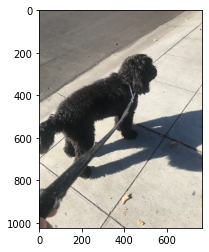

In [303]:
im1 = Image.open("/Users/yoarafa/Documents/MachineLearning/DogsCats/LeoTest/img1.jpg")
imshow(im1)

This is an image from the back

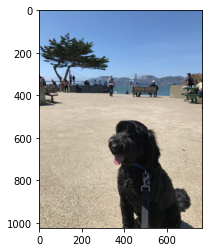

In [299]:
im1 = Image.open("/Users/yoarafa/Documents/MachineLearning/DogsCats/LeoTest/img2.jpg")
imshow(im1)

Here's a normal one from the front with the tongue prominent

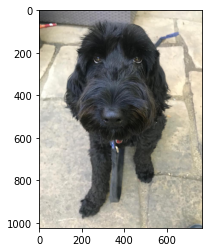

In [302]:
im1 = Image.open("/Users/yoarafa/Documents/MachineLearning/DogsCats/LeoTest/img3.jpg")
imshow(im1)

This is a closeup face shot

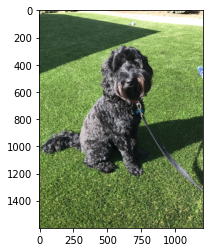

In [300]:
im1 = Image.open("/Users/yoarafa/Documents/MachineLearning/DogsCats/LeoTest/img4.jpg")
imshow(im1)

And this one has a different background and has no tongue

In [304]:
leo_images = []

In [305]:
for infile in glob.glob("/Users/yoarafa/Documents/MachineLearning/DogsCats/LeoTest/*.jpg"):
    with Image.open(infile) as im:
        width, height = im.size
        if width < height:
            new_width = width
            new_height = width
        else:
            new_width = height
            new_height = height
        
        left = round((width - new_width)/2)
        top = round((height - new_height)/2)
        x_right = round(width - new_width) - left
        x_bottom = round(height - new_height) - top
        right = width - x_right
        bottom = height - x_bottom

        im = im.crop((left, top, right, bottom))
        im = im.resize(size)
        im = numpy.asarray(im.convert('LA'))
        leo_images.append(im)

In [306]:
leo_images = numpy.array(leo_images)

In [307]:
leo_images.shape

(4, 128, 128, 2)

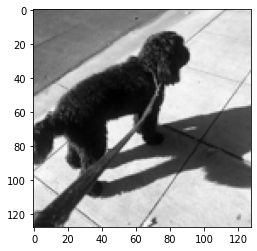

In [317]:
imshow(leo_images[3][:,:,0], cmap='gray')

The resizing makes the image really blurry, I hope the shadow doesn't mess up the model because it comes out much darker

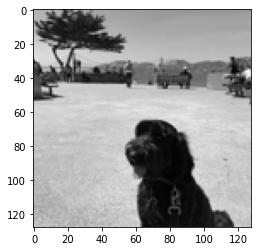

In [313]:
imshow(leo_images[2][:,:,0], cmap='gray')

Wow the quality has gone down so much he looks like a blob, I wouldn't be surprised if the model was confused

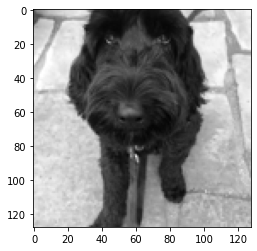

In [316]:
imshow(leo_images[1][:,:,0], cmap='gray')

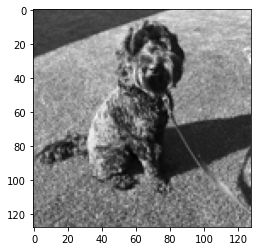

In [315]:
imshow(leo_images[0][:,:,0], cmap='gray')

This one I'm really worried about because the grayscale conversion makes it so he almost blends into the background

In [308]:
leo_3d_images = numpy.expand_dims(leo_images[:, :, :, 0], axis=3)

In [309]:
model2.predict(leo_3d_images)

array([[2.96713570e-05, 9.99970317e-01],
       [1.07439686e-04, 9.99892592e-01],
       [1.24226115e-03, 9.98757720e-01],
       [1.95448141e-04, 9.99804556e-01]], dtype=float32)

In [310]:
numpy.argmax(model2.predict(leo_3d_images), axis=1)

array([1, 1, 1, 1])

Yay!! It's so amazing that the model recognized Leo! The model's confidence is the most surprising part, and overall it's such a great relief to see it working fantastically in the real world.

In [318]:
model2.save('CatsDogsCNNmodel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: catsdogsCNNmodel/assets
